In [35]:
# import
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from src.helpers.data import load_data_to_dataframe
from src.helpers.data import data_by_department

In [36]:
# Load the train data

trainig_data_frame = load_data_to_dataframe(Path("training_data/train.parquet"))
print(trainig_data_frame.head())
# print("data type and information of the training_data_frame", trainig_data_frame.info())
trainig_data_frame["day_id"] = pd.to_datetime(trainig_data_frame["day_id"])
# print("data type and information of the training_data_frame", trainig_data_frame.info())
bu_feat_data = load_data_to_dataframe(Path("training_data/bu_feat.parquet"))
# print(bu_feat_data.head())

       day_id  but_num_business_unit  dpt_num_department     turnover
0  2017-09-30                     64                 127   580.308443
1  2017-09-30                    119                 127  1512.995918
2  2017-09-30                      4                  88   668.593556
3  2017-09-30                    425                 127     0.000000
4  2017-09-30                    513                  73     0.000000


### Q1
Which department made the highest turnover in 2016? <br>
deparment with highest turnover, 127

In [37]:
data_from_year_2016 = trainig_data_frame[trainig_data_frame["day_id"].dt.year == 2016]
department_turnover_2016 = data_from_year_2016.groupby("dpt_num_department")["turnover"].sum()
print(f"deparment with highest turnover, {department_turnover_2016.idxmax()}")

deparment with highest turnover, 127


### Q2
What are the top 5 week numbers (1 to 53) for department 88 in 2015 in terms of turnover over all stores? <br>
#### give week number
Top 5 performing weeks are:
| day_id | but_num_business_unit |dpt_num_department  | turnover
| --- | ---|---|---|
|2015-01-10                    |132                  |88  |2306.643525
|2015-07-11                     |4                  |88  |2073.152091
|2015-07-25                      |4                  |88  |2070.041381
|2015-07-04                      |4                  |88  |2028.924124
|2015-09-12                     |11                  |88  |1935.623844


In [38]:
import pandas as pd

trainig_data_frame["day_id"] = pd.to_datetime(trainig_data_frame["day_id"])
year = 2015  # Change this to the desired year
department = 88  # Change this to the desired department number
filtered_data = trainig_data_frame[
    (trainig_data_frame["day_id"].dt.year == year)
    & (trainig_data_frame["dpt_num_department"] == department)
]
grouped_data = filtered_data.groupby(
    ["day_id", "but_num_business_unit", "dpt_num_department"]
).sum()
grouped_data = grouped_data.reset_index()
top_performing_weeks = grouped_data.sort_values(by="turnover", ascending=False).head(5)

print(top_performing_weeks)

         day_id  but_num_business_unit  dpt_num_department     turnover
371  2015-01-10                    132                  88  2306.643525
7366 2015-07-11                      4                  88  2073.152091
7914 2015-07-25                      4                  88  2070.041381
7092 2015-07-04                      4                  88  2028.924124
9845 2015-09-12                     11                  88  1935.623844


### Q3
What was the top performer store in 2014? <br>
| comment | value |
|--|--|
|Maximum turnover: |166858.49596963584|
|Department with maximum turnover: |127 |
|Business unit with maximum turnover: |121|


In [39]:
data_from_year_2014 = trainig_data_frame[trainig_data_frame["day_id"].dt.year == 2014]
business_turnover_2014 = data_from_year_2014.groupby(
    ["dpt_num_department", "but_num_business_unit"])["turnover"].sum().reset_index()
index_for_maximum_turnover = business_turnover_2014["turnover"].idxmax()
print(
    "Maximum turnover:",
    business_turnover_2014.loc[index_for_maximum_turnover, "turnover"],
)
print(
    "Department with maximum turnover:",
    business_turnover_2014.loc[index_for_maximum_turnover, "dpt_num_department"],
)
print(
    "Business unit with maximum turnover:",
    business_turnover_2014.loc[index_for_maximum_turnover, "but_num_business_unit"],
)

Maximum turnover: 166858.49596963584
Department with maximum turnover: 127
Business unit with maximum turnover: 121


### Q4
Based on sales can you guess what kind of sport represents department 73? <br>
Looks like the summer sales, I guess sportswear like swimming, trekking and some shoes and cloths. 

      day_id      turnover
0 2012-12-29   9970.080027
1 2013-01-05   6571.632302
2 2013-01-12  15447.596587
3 2013-01-19  14477.454643
4 2013-01-26  11717.729198


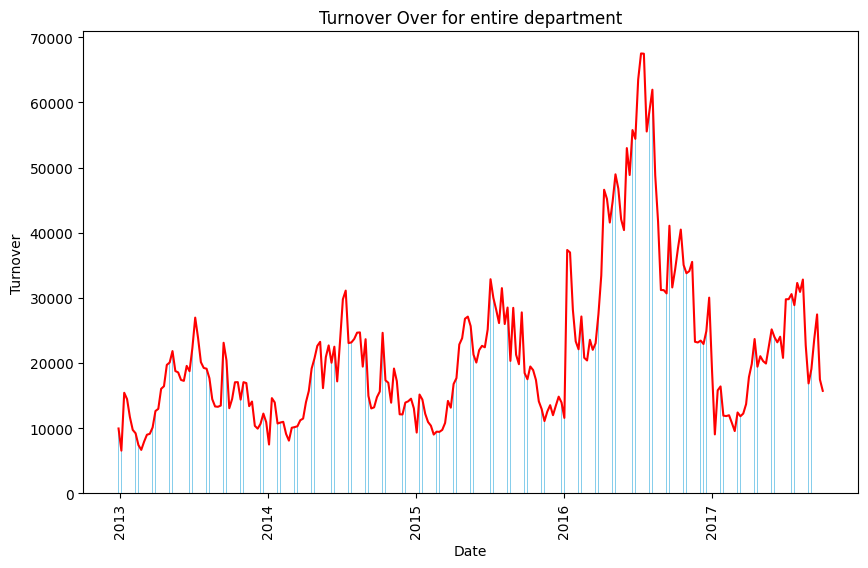

In [40]:

figure = data_by_department(
    data_frame=trainig_data_frame,
    department_number=73,
)
plt.show()

### Q5
Based on sales can you guess what kind of sport represents department 117? <br>
Looks like winter sales, I guess it should be related to ski, winter sports, Jackets, wool socks, Shoes, Skies and so on ..

      day_id       turnover
0 2012-12-29  423647.279693
1 2013-01-05  277247.028448
2 2013-01-12  537275.900375
3 2013-01-19  619333.949770
4 2013-01-26  468839.858931


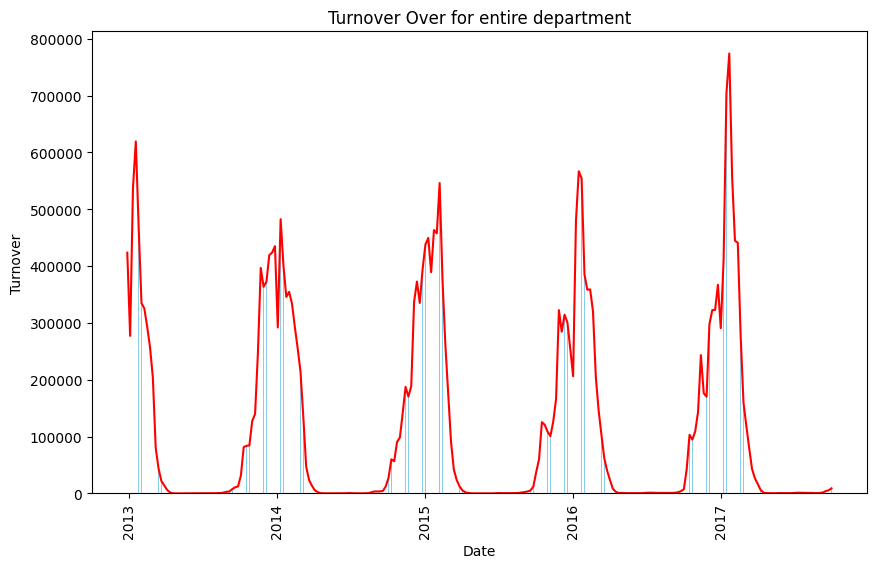

In [41]:
figure = data_by_department(
    data_frame=trainig_data_frame,
    department_number=117,
)
plt.show()

### Q6
Are the time series stationary? Is this a problem? <br>
Time series data for certain stores/business units is stationary and others are not. To judge this I looked at the detrended data, and also we conducted a Dickey-Fuller test.<br>
Stationary time series are easier in prediction when compared to non-stationary time series.

In [49]:
from statsmodels.tsa.stattools import adfuller

department = 117
filter_department = trainig_data_frame[(trainig_data_frame["dpt_num_department"] == department)
    ]
for business in filter_department["but_num_business_unit"].unique():
    filtered_df = trainig_data_frame[
        (trainig_data_frame["but_num_business_unit"] == business)
        & (trainig_data_frame["dpt_num_department"] == department)
    ]
    data_values = filtered_df["turnover"]
    if len(data_values.values):
        result = adfuller(data_values)
        if result[1] > 0.0001:
            print(
                f"Fail to reject the null hypothesis - Data for deparement {department} and  buisness unit {business} is non-stationary"
            )
        else:
            print(
                f"Rejected the null hypothesis - Data for deparement {department} and  buisness unit {business} is stationary"
            )

Rejected the null hypothesis - Data for deparement 117 and  buisness unit 10 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 1601 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 381 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 507 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 522 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 461 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 243 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 216 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 49 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 13 is stationary
Rejected the null hypothesis - Data for deparement 117 and  buisness unit 539 is s

### Q7
Can the time series be decomposed into several key components? <br>
Yes, time series can be decomposed into trends, seasonal and residual components. <br>
You can find a code that will help to visualize the trends for a sample data. 


/var/folders/3m/1kzchp157fv47zl0lfvsrf2m0000gn/T/ipykernel_59433/2310343526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_id'] = pd.to_datetime(df['day_id'])


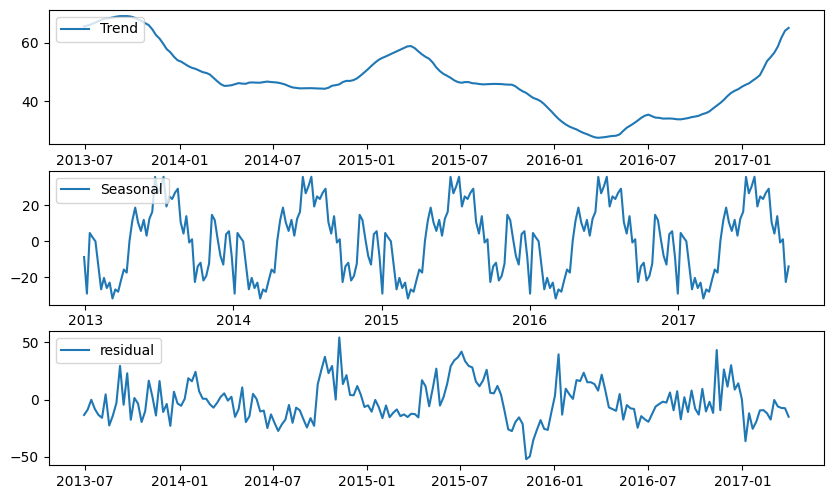

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

department = 117
business = 10
df = trainig_data_frame[
    (trainig_data_frame["but_num_business_unit"] == 53)
    & (trainig_data_frame["dpt_num_department"] == 73)
]
df['day_id'] = pd.to_datetime(df['day_id'])
df.set_index('day_id', inplace=True)
result = seasonal_decompose(df['turnover'], model='additive')

plt.figure(figsize=(10, 8))

# Trend
plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonal
plt.subplot(4, 1, 2)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Residual
plt.subplot(4, 1, 3)
plt.plot(result.resid, label="residual")
plt.legend(loc="upper left")

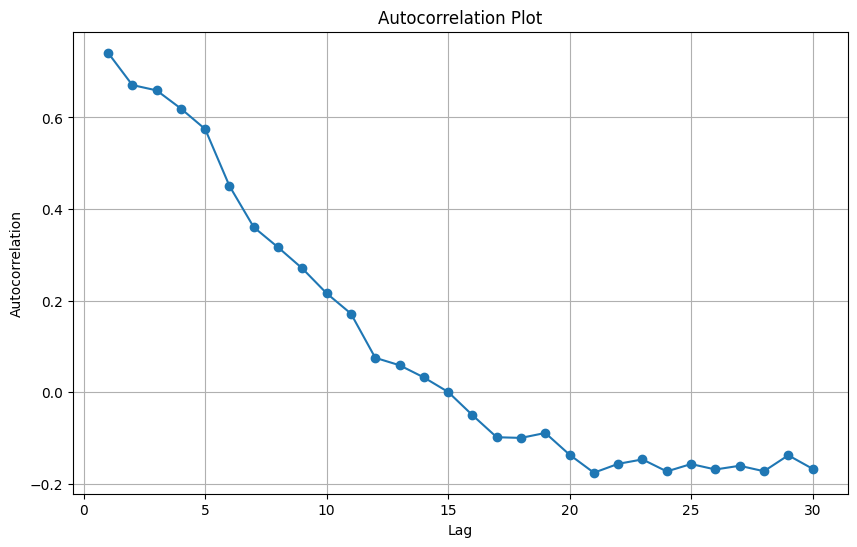

In [48]:
department = 117
business = 10
df = trainig_data_frame[
    (trainig_data_frame["but_num_business_unit"] == 53)
    & (trainig_data_frame["dpt_num_department"] == 73)
]

autocorr_values = [
    df["turnover"].autocorr(lag=i) for i in range(1, 31)
]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), autocorr_values, marker="o", linestyle="-")
plt.title("Autocorrelation Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()